<a href="https://colab.research.google.com/github/Prakhar967/Jamboree_case_study/blob/main/jamboree_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE : To identify key factors influencing graduate admission and build a model that predicts a student chance of getting into top universities using data driven insights tailored to indian applicants

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')

In [ ]:
df          # This is the dataset that we are provided

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.shape   # there are 500 rows  and 9 columns

(500, 9)

In [ ]:
df.drop('Serial No.', axis = 1, inplace = True)       # we can drop this row as this is very musch irrelevant to our analysis

In [ ]:
df.isna().sum()           # we can clearly see that there are no missing values in my dataset

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.loc[df.duplicated()]    # we can see that there are no duplicated records in my dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
df.info()     # Here we can see the datatype of the respective columns and number of values stored in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


INSIGHT :
1. The dataset contains 800 records with 8 relevant columns, capturing academic metrics and admission-related variables.
2. GRE scores range from 290 to 340, TOEFL scores range from 92 to 120, and CGPA ranges from 6.82 to 9.92, indicating that the dataset largely represents above-average students.
3. With an average GRE score of 316, TOEFL score of 107, and CGPA of 8.57, the average chance of admission is approximately 72%, achieved by nearly half of the applicants.
4. A perfect GRE score of 340 and maximum TOEFL score of 120 correspond to a maximum observed admission chance of 97%, suggesting a strong correlation between high scores and admit probability.
5. Students with a CGPA around 8.5 also show an average chance of admission near 72%, reflecting the importance of consistent academic performance.
6. Research experience significantly boosts admission chances—students without research have a minimum admission chance of 34%, while those with research experience can reach up to 97%.




COMMENTING ON RANGE OF ATTRIBUTES


1. GRE Score ranges from 290 to 340, a spread of 50 points.
2. TOEFL Score ranges from 92 to 120, a range of 28 points.
3. CGPA ranges from 6.8 to 9.92, indicating a narrower but still   significant academic variation.
4. University Rating, SOP, and LOR are rated on a scale of 1 to 5, showing qualitative judgment scores.
5. Chance of Admit ranges from 0.34 to 0.97, which suggests wide variation in admission likelihood.
6. The Research attribute is binary (0 or 1), indicating absence or presence of research experience.



## For checking outliers

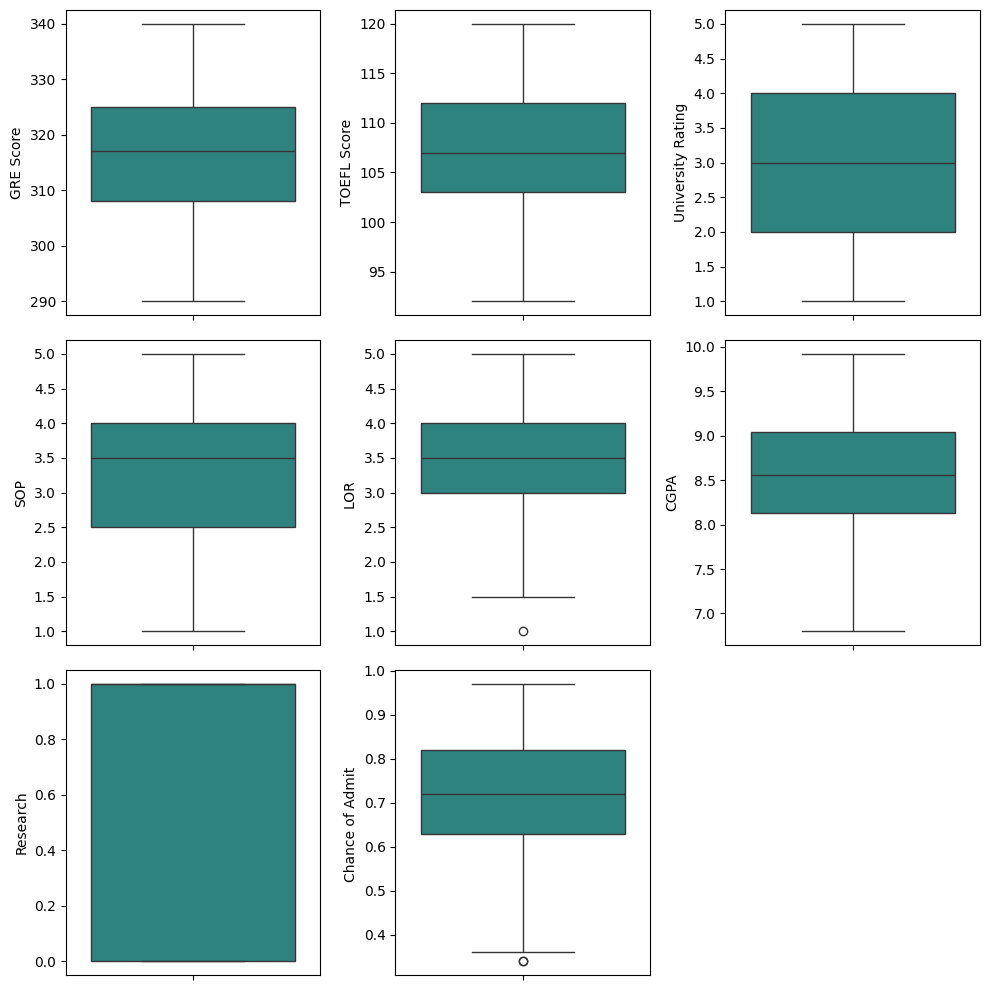

In [ ]:
plt.figure(figsize=(10,10))

for i in enumerate(df.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]] , palette = 'viridis')
plt.tight_layout()
plt.show()


### INSIGHTS : we can clearly see that there are no significant outliers in our data .

# UNIVARIATE ANALYSIS

<Axes: xlabel='GRE Score', ylabel='Count'>

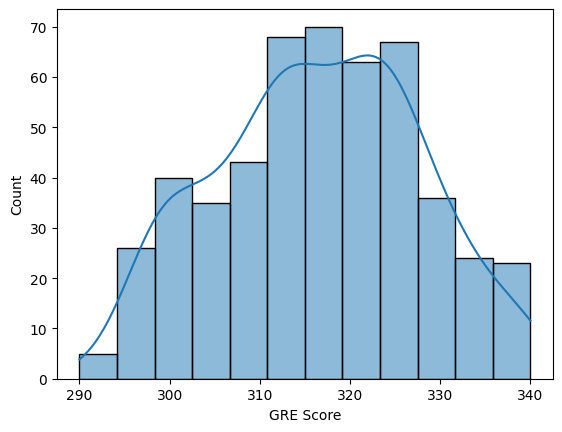

In [ ]:
sns.histplot(df['GRE Score'], palette ='viridis' , kde = True)     # we are visualizing GRE score with histogram along with KDE

### INSIGHT : This plot is very close to normal

<Axes: xlabel='TOEFL Score', ylabel='Count'>

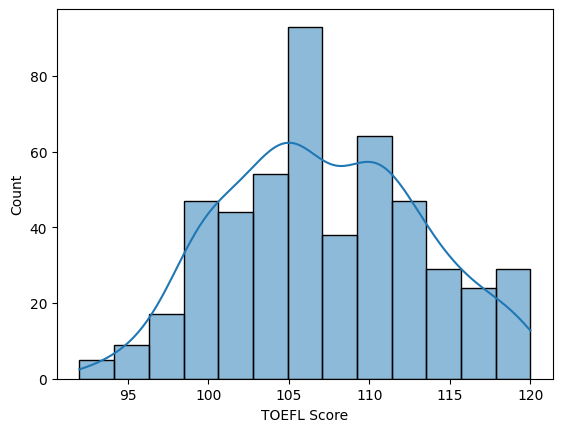

In [ ]:
sns.histplot(df['TOEFL Score'], palette ='viridis' , kde = True)

### INSIGHT :  This plot is also very close to normal with average score of 105

<Axes: xlabel='University Rating', ylabel='count'>

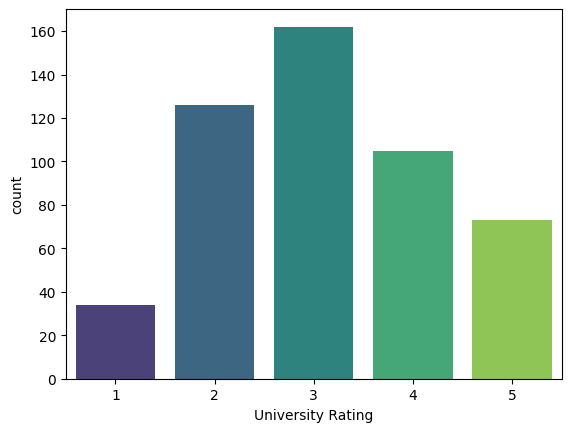

In [ ]:
sns.countplot(x='University Rating', data=df, palette ='viridis')

### INSIGHT : This is a discrete level analysis which shows that there are more people in jamboree with unversity  rating of 3 and it is also very close to normal data

<Axes: xlabel='Research', ylabel='count'>

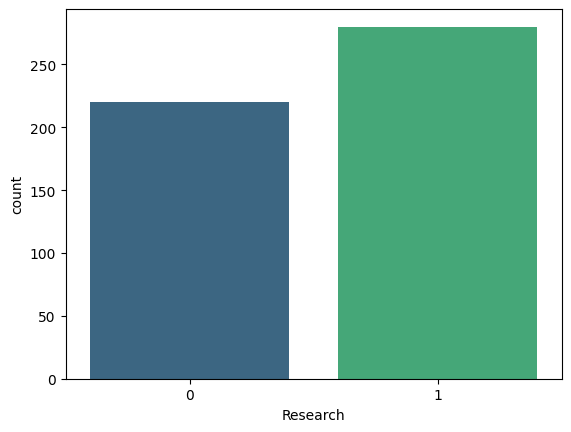

In [ ]:
sns.countplot(x='Research', data=df, palette ='viridis')

### INSIGHT : There are more number of people coming with research in jamboree and this also shows that possibility of large number of people selecting from jamboree will be high

<Axes: xlabel='SOP', ylabel='count'>

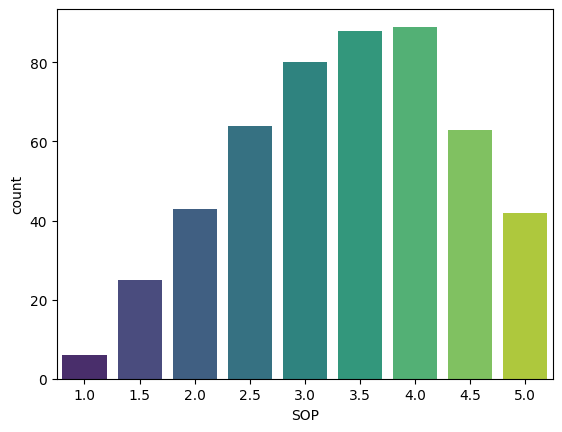

In [ ]:
sns.countplot(x='SOP', data=df, color='lightblue' , palette = 'viridis' )

### INGIGHT : This is a discrete level analysis with SOP of 4.0 being highest in jamboree

<Axes: xlabel='LOR ', ylabel='count'>

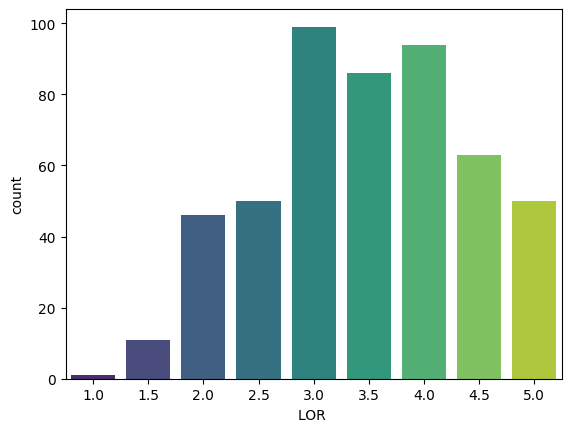

In [ ]:
sns.countplot(x='LOR ', data=df, color='lightblue' , palette = 'viridis' )

### INSIGHT : This is also a discrete level analysis in which LOR of 3.0 and 4.0 being highest and there is almost 0 number of cases with LOR less than 1.5

<Axes: xlabel='CGPA', ylabel='Count'>

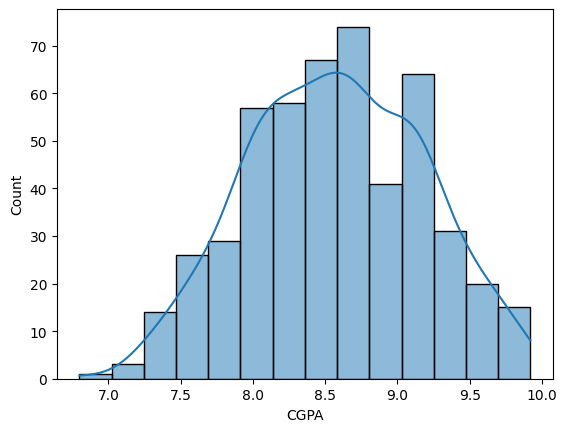

In [ ]:
sns.histplot(df['CGPA'], palette ='viridis' , kde = True)

### INSIGHT :  This is continuous level analysis where data is  actully resembling more close to normal distribution with highest average of student of 8.9

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

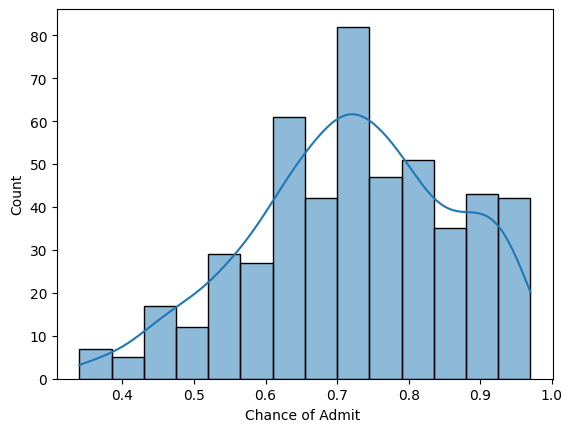

In [ ]:
sns.histplot(df['Chance of Admit '], palette ='viridis' , kde = True)

### INSIGHT : This plot is continuos level analysis where plot is slightly left skewed . Which suggest more stident have higher chance of admission centere around .7 and .8 and fewer students have a very low chance of admission which creates the left tail.

# BIVARIATE ANALYSIS

## Relationship with Research vs Chance of Admit

<Axes: xlabel='Research', ylabel='Chance of Admit '>

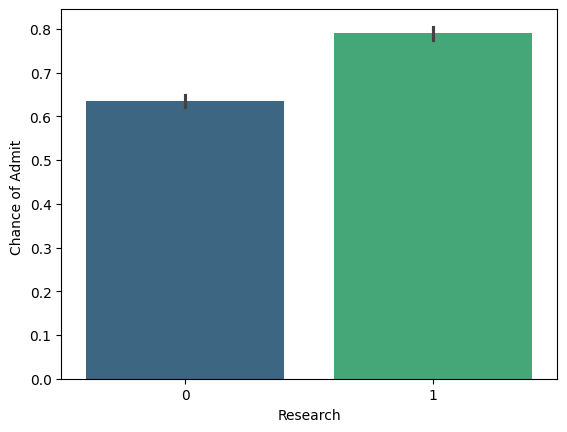

In [ ]:
sns.barplot(data=df, x='Research', y='Chance of Admit ' , palette = 'viridis' )

### INSIGHTS: we can clearly see that students with research background have higher chances of admission in foreign university which means we can encourage students to pursue research projects or internship during their academic years

## Relationship of university vs chance of admit

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

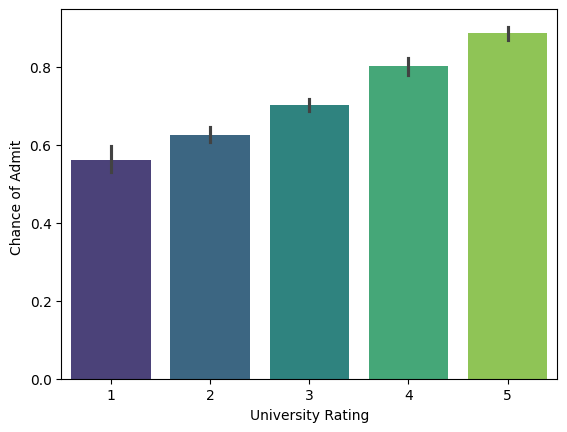

In [ ]:
sns.barplot(data=df, x ='University Rating', y ='Chance of Admit ' , palette = 'viridis' )

### INSIGHT : we can clear;y see that higher rated university rating contributes more to the chance of admission.

## Relationship of GRE score and chance of admit

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

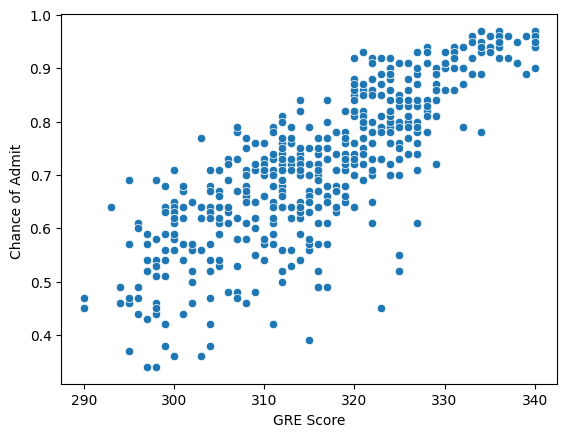

In [ ]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'Chance of Admit ', palette = 'viridis')

### INSIGHT : we can clearly see that there is a linear relationship between GRE score and chance of admit so it suggest that higher GRE score increases the chance of admission

## Relationship of Letter of Recommendation with chance of admit

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

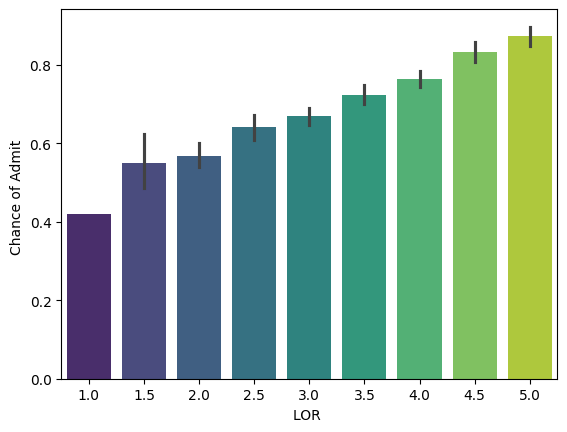

In [ ]:
sns.barplot(data = df, x = 'LOR ' , y = 'Chance of Admit ' , palette = 'viridis')

### INSIGHT : we can clearly see that there is an increasing trend in the chance of admit and LOR which ultimately tells us that highly rated letter of recommendation increases the chance of admission in foreign universities

## Relation between TOEFL score and Chance of admit

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

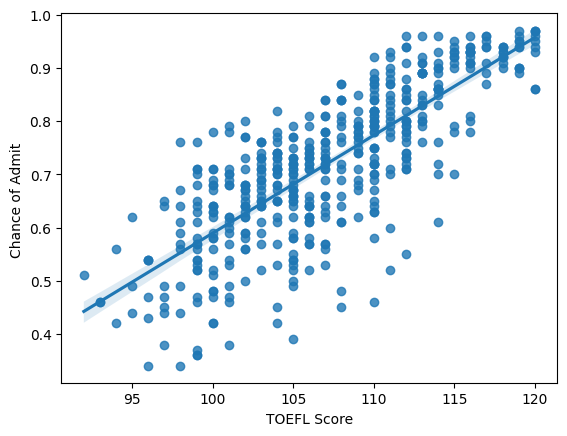

In [ ]:
sns.regplot(data = df, x = 'TOEFL Score', y = 'Chance of Admit ')

### INSIGHT : This plot clearly tells us that there is an linear relationship between TOEFL score and chance of admission

## Relationship between Statement of purpose and chance of admit

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

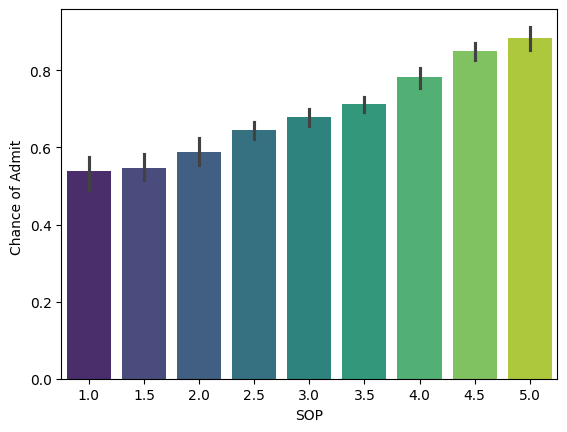

In [ ]:
sns.barplot(data = df, x = 'SOP' , y = 'Chance of Admit ' , palette = 'viridis')

### INSIGHT : Well defined statement of purpose increases the chance of admission in foreign universities

## Relationship with CGPA and chance of admit

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

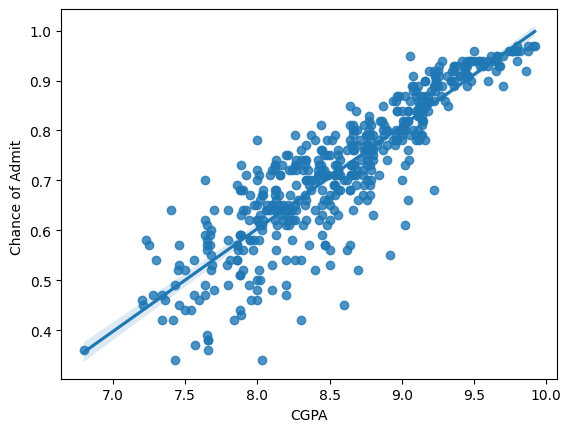

In [ ]:
sns.regplot(data = df, x = 'CGPA', y = 'Chance of Admit ')

### INSIGHT : Higher CGPA contributes to higher chance of admission in foreign universities which is the usual norms

## Relationship with letter of recommendation and CGPA

<Axes: xlabel='LOR ', ylabel='CGPA'>

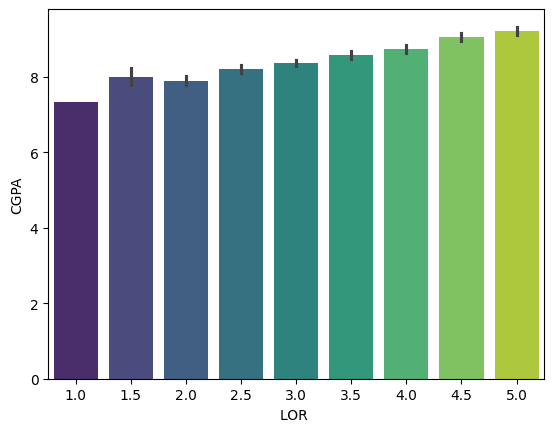

In [ ]:
sns.barplot(data = df, x = 'LOR ' , y = 'CGPA' , palette = 'viridis')

### INSIGHT: from this we can see that though letter if recommendation contribute to the higher CGPA but we can also see that letter of recomendation with 1.5 has scored hogher CGPA than 2.0 which is possible as letter of recommendation is unsually generated on personal level interactions

## Relationship with GRE and letter of recommendation

<Axes: xlabel='LOR ', ylabel='GRE Score'>

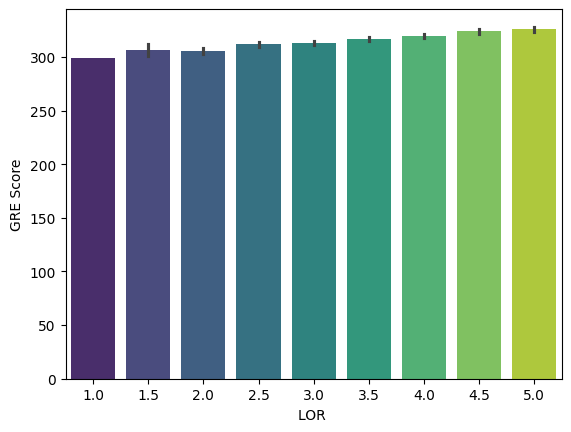

In [ ]:
sns.barplot(data = df, y = 'GRE Score' , x = 'LOR ' , palette = 'viridis')

### INSIGHT : Here also we can see that although the general trend says that higher LOR score will have higher GRE score but again there are some cases that voilates this assumption as GRE score is basically individual level talent which suggest that it is not always that a student with higher marks will always do good in life.

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Relationship of GRE with university rating

<Axes: xlabel='University Rating', ylabel='GRE Score'>

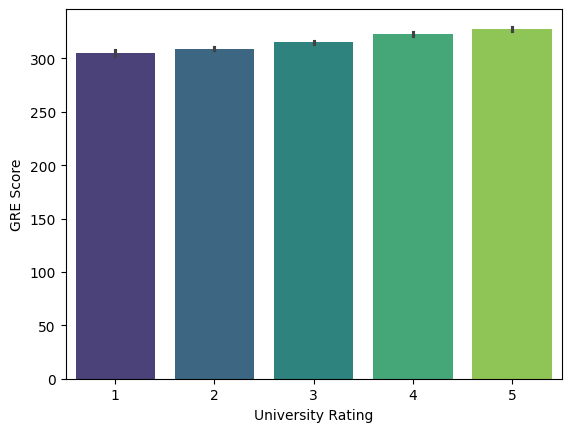

In [ ]:
sns.barplot(data = df, y = 'GRE Score' , x = 'University Rating' , palette = 'viridis')

## Corelation among independent variables

In [ ]:
num  = ['GRE Score', 'TOEFL Score',  'CGPA', 'Chance of Admit ']

<Axes: >

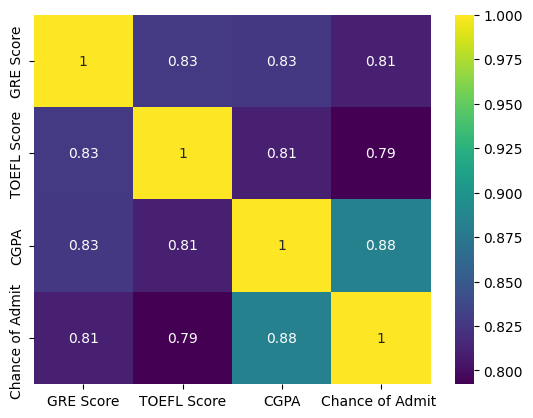

In [ ]:
sns.heatmap(df[num].corr(), annot = True , cmap = 'viridis')    # we can not use 'University rating','SOP','LOR'
                                                                # as they are discrete categorical variables

### INSIGHT: GRE Score , TOEFL score and CGPA show a strong positive correlation with each other and with thechance of admit (correlation>.79). Among them , CGPA has the strongest correlation(.88) with admission chances indicating it's a major factor in the selection process

## Perform Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Chance of Admit '  , axis = 1)
y = df['Chance of Admit ']

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

### NOTE : I am excluding University rating , SOP , reasearch , LOR from my scaling because they have low cardinality and represent ordinal or binary data. Scaling them could distort their interpretibility without improving model performance . Keeping them unscaled preserves their natural meaning.

In [ ]:
# Columns to **exclude** from scaling
exclude_cols = ['University Rating', 'SOP', 'Research', 'LOR ']

# Columns to scale
scale_cols = [col for col in x_train.columns if col not in exclude_cols]

# Scale only the desired columns
x_train_scaled_part = pd.DataFrame(std.fit_transform(x_train[scale_cols]), columns=scale_cols, index=x_train.index)

# Keep excluded columns unscaled
x_train_unscaled_part = x_train[exclude_cols]

# Concatenate both
x_train_final1 = pd.concat([x_train_scaled_part, x_train_unscaled_part], axis=1)

# Repeat for test set using same scaler
x_test_scaled_part = pd.DataFrame(std.transform(x_test[scale_cols]), columns=scale_cols, index=x_test.index)

x_test_unscaled_part = x_test[exclude_cols]

x_test_final1 = pd.concat([x_test_scaled_part, x_test_unscaled_part], axis=1)

### Now we can check if there exist any multicollinearity between different variables

## VARIANCE INFLATION FACTOR

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_vif = x_train_final1.copy()

vif_data = pd.DataFrame()
vif_data["Feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

print(vif_data)

             Feature        VIF
0          GRE Score   4.484412
1        TOEFL Score   3.587640
2               CGPA   3.685440
3  University Rating  20.380135
4                SOP  29.184206
5           Research   3.340733
6               LOR   23.655997


### We can clearly see the VIF values for University Rating , SOP , LOR is quite high

In [ ]:
def drop_high_vif_columns(df, threshold=5.0):
  while True:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    max_vif = vif_data["VIF"].max()
    if max_vif > threshold:
        drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping '{drop_feature}' with VIF = {max_vif:.2f}")
        df = df.drop(columns=[drop_feature])
    else:
        break
  return df, vif_data

In [ ]:
x_vif_cleaned, final_vif_table = drop_high_vif_columns(x_train_final1, threshold=5.0)

Dropping 'SOP' with VIF = 29.18
Dropping 'University Rating' with VIF = 15.35


### SOP and University Ranking showed high multicollinarity with VIFs above threshold (29.18 and 15.35) . To improve model stability i dropped them from the dataset.

In [ ]:
final_vif_table

,Feature,VIF
0,GRE Score,4.467170
1,TOEFL Score,3.531874
2,CGPA,3.682496
3,Research,3.200374
4,LOR,2.796390


In [ ]:
x_vif_cleaned

,GRE Score,TOEFL Score,CGPA,Research,LOR
249,0.389986,0.602418,0.415018,1,4.0
433,-0.066405,0.602418,-0.067852,0,5.0
19,-1.253022,-0.876917,-0.134454,0,3.0
322,-0.248961,-0.055064,-0.517420,0,4.0
332,-0.796631,-0.219435,-0.617324,1,2.5
...,...,...,...,...,...
106,1.120212,0.602418,0.997792,1,4.5
270,-0.979187,-0.383805,-0.600673,1,3.0
348,-1.344300,-1.370029,-2.215790,0,2.0
435,-0.705353,-0.383805,-1.499810,0,4.0


In [ ]:
x_train_final = x_vif_cleaned.copy()
x_test_final = x_test_final1[x_vif_cleaned.columns]

## Testing the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso , Ridge , ElasticNet

In [ ]:
models = [['Linear Regression :', LinearRegression()],['Lasso Regression :', Lasso(alpha=0.5)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)]] #try with different alpha values

In [ ]:
for name,model in models:
    model.fit(x_train_final,y_train)
    y_pred = model.predict(x_test_final)
    print(name,r2_score(y_test,y_pred) , ',','coefficient:',model.coef_,',','intercept:', model.intercept_ )
    print()

Linear Regression : 0.8155002070847486 , coefficient: [0.02687911 0.01910598 0.06906616 0.02460129 0.01869556] , intercept: 0.6454607326331392

Lasso Regression : -0.00724844132029312 , coefficient: [0. 0. 0. 0. 0.] , intercept: 0.7241749999999999

Ridge Regression : 0.8152795590208257 , coefficient: [0.02708829 0.01927556 0.06858493 0.02436796 0.01879843] , intercept: 0.6452322354909523



### Linear and Ridge Regression performd similarly with R2_score of .8155 indicating strong predictive power . Lasso regression underperformed likely due to high regularization (alpha = .5) driving coefficients to zero

## USING STATSMODEL

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_final_sm = sm.add_constant(x_train_final)

In [ ]:
model = sm.OLS(y_train.values,x_train_final_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        15:08:32   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6455      0.015     42.248      

## INSIGHT : we caan see that p value is within limit for all the shown columns so now we can proceed further

### INSIGHTS : The model shows strong performance with an R2_score of .821 and adjusted R2_score of .818 indicating high explanatory power. All predictors are statistically significant (p<.05) , suggesting their meaningful contribution to the model The durbin-watson value(2.05) indicates no autocorelation in residuals

## Displaying model coefficients weights

In [ ]:
model.params                          # model coefficients weights

,0
const,0.645461
GRE Score,0.026879
TOEFL Score,0.019106
CGPA,0.069066
Research,0.024601
LOR,0.018696


### Now lets test the model

In [ ]:
x_test_final_sm = sm.add_constant(x_test_final)       # trying to add constant value to my test data set

### Predicting from our clean model

In [ ]:
pred = model.predict(x_test_final_sm)         # now i am predicting my value based on my training upon the dataset

### Finding the mean_square_error , r2_score, mean_absolute_error

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))
r2 = r2_score(y_test.values,pred)
print('R2 Score ', r2)
n = len(y_test)                         # number of observations
k = x_test_final_sm.shape[1]-1          # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print('Adjusted R2 Score:', adj_r2)

Mean Absolute Error  0.04292345578265778
Root Mean Square Error  0.061424919740418825
R2 Score  0.8155002070847485
Adjusted R2 Score: 0.8056863883126606


1. on average the model's prediction are off by 0.04
2. The error is low , meaning the model is doing a good job
3. The model can explain about 81% of the results correctly
4. Even after adjusting for the number of inputs , it stills performs well with 80% accuracy.



## MEANS OF RESIDUALS

In [ ]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005305947942349283


## Test for Homoscedasticity

1. null : variance of residuals is constant and the data is homoscedastic
2. alternate : variance of residuals is not constant and the data id heteroscedastic

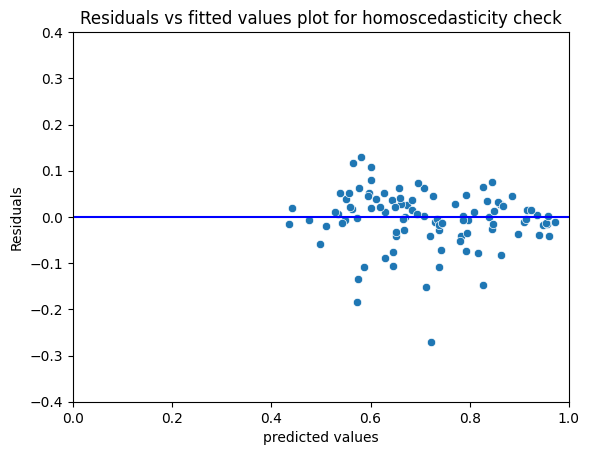

In [ ]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test_final)
lzip(name, test)

[('F statistic', np.float64(0.5958511313619439)),
 ('p-value', np.float64(0.9570620005106119))]

### since p-value is coming out to be so large therefore we fail to reject null hypothesis and the data is homoscedastic

## Normality of Residuals

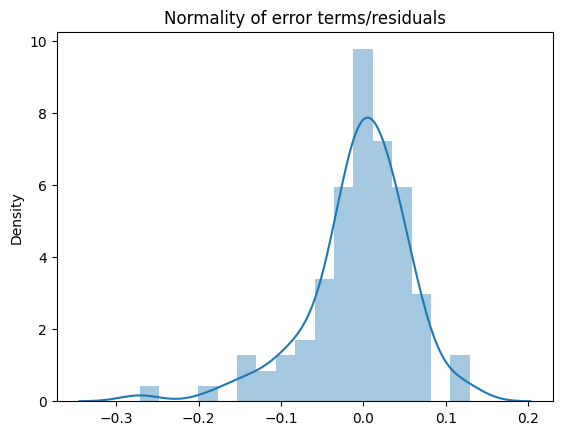

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### Although the residuals do not follow a perfectly normal distribution, they are approximately normal which is generally considered acceptable for linear regression assumptions especially with a large sample size

Text(0, 0.5, 'y_pred')

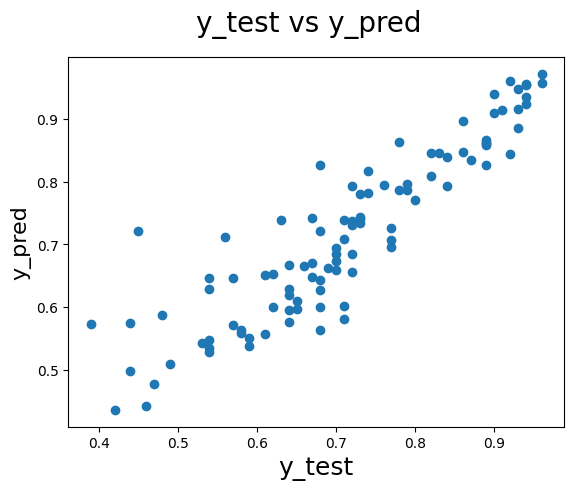

In [ ]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The scatter plot of actual vs predicted values demonstrated  a strong positive linear relationship , suggesting that my linear regression model has learned the underlying pattern in data quite well.Most points are clustered around the diagonal , indicating accurate predictions with a few moderate deviations which could be due to noise.

## Linear relationship between the dependent and independent variable

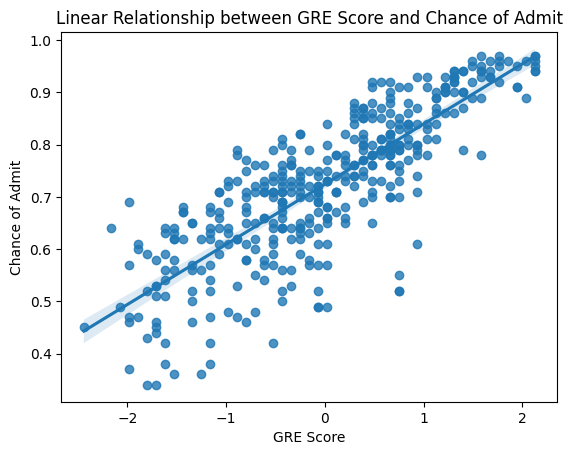

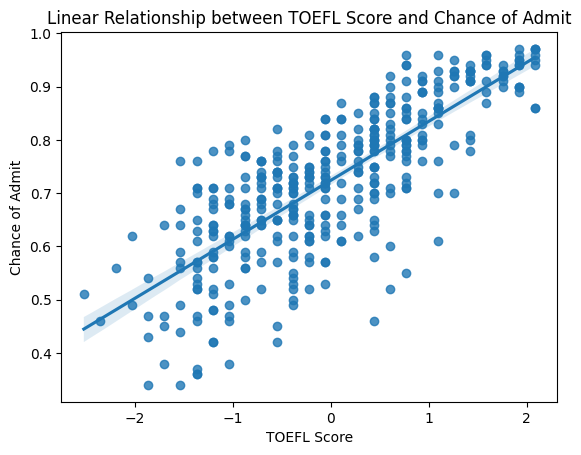

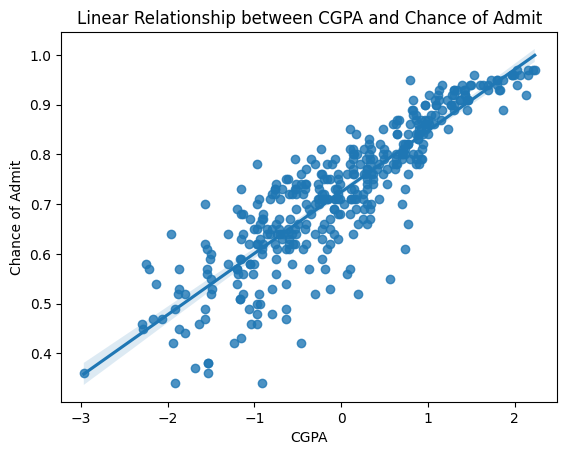

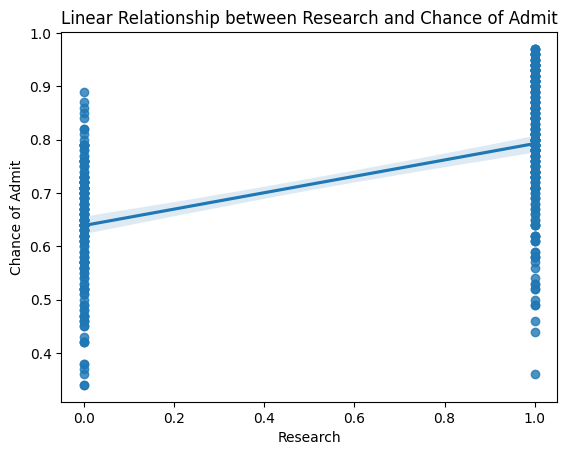

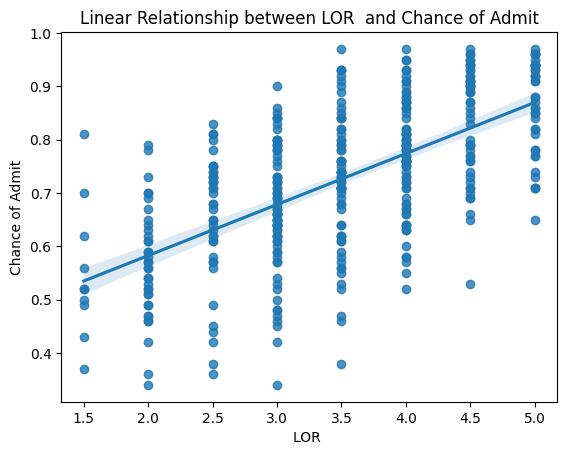

In [ ]:
for col in x_train_final_sm.columns:
    if col != 'const':  # skip the constant column
        sns.regplot(x=x_train_final_sm[col], y=y_train)
        plt.title(f"Linear Relationship between {col} and Chance of Admit")
        plt.xlabel(col)
        plt.ylabel("Chance of Admit")
        plt.show()

1. GRE Score , TOEFL score and CGPA demonstrate strong relationship with the chance of admit supporting their inclusion in a linear egression model
2. LOR and Research have limited unique values (9 and 2) respectively so while they show some trend their contribution is more discrete in nature
3. overall , the model satisfies the linearity assumptions for key predictors

## BIAS AND VARINACE :

1. The model's R2_score of .81 indicates that it captures the underlying pattern in the data well. This low bias also suggest that model is not underfitting.
2. Training and test R2_score are close ,model has moderate variance and is not severly overfitting.
3. Residuals are centeres around 0 with low mean error , siggesting errors are randomly distributed.
4. Similar R2_score and adjusted R2_score along with low MAE and RSME , show that model is robust.

# RECOMMENDATIONS:

1. CGPA shows the strongest correlation wtih the chance of admission (.88). This should be given higher weightage in jamboree.
2. GRE and TOEFL score are also strong predictors . we can use this to guide students on which section to focus on (quant/verbal)
3. Students with research experience show noticebaly better admission chances.Jamboree has to encourage and guide students to pursue research/internships
4. Avoid over-reliance on SOP and University Rating as these variables had high multicollinearity and were removed from the model. Reduce too much dependence on them in strategic guidance
5.  Jamboree can build a student facing dashboard showing "Your Estimated Admit Chance" and break it down by key features CGPA , GRE , TOEFL,Research.
6. categorize studens into certain cohorts like low-CGPA-high GRE , high CGPA-low TOEFL and we offer some tailored advice to each groups.
7. As admission trends keeps changing the model should be retrained regularly with the latest data from the students
8. We can create visual feedback dasboard that generates simple summary like scorecard for each students highlighting strengths and weak areas so that they can improve further.
9. based on the model coefficients and visual pattern we can create a minimum recommended threshold that can act as a clear targets for students aiming at top universities
10. we can also group universsities into Dream, competitive and safe clusters based on applicant profiles then let student compares their scores with typical admit in each group - helping them build a balanced and smart application list.
